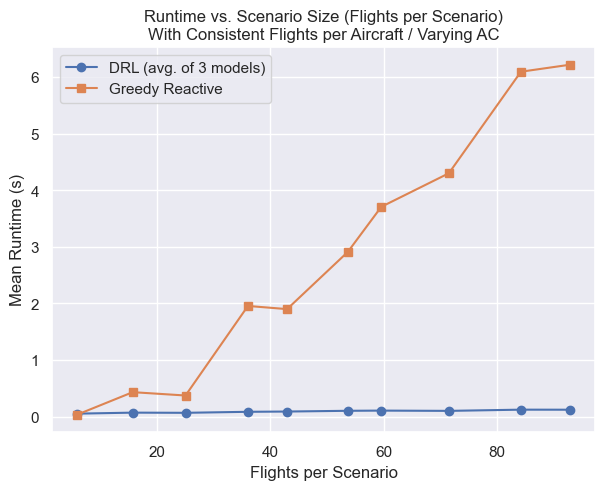

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# Load data
df = pd.read_csv("runtimes_abc.csv")

# Rename 'exact' to 'Heuristic' (or 'Greedy', whichever is preferred)
df.loc[df['model'] == 'exact', 'model'] = 'Greedy Reactive'

# Identify which models are DRL
drl_models = ["myopic_2023.zip", "proactive_2023.zip", "reactive_2023.zip"]
heuristic_model = ["Greedy Reactive"]

# Create a new column to differentiate DRL vs. Heuristic
df['model_type'] = df['model'].apply(lambda x: 'DRL' if x in drl_models else 'Heuristic')

# Group by scenario size (e.g., flights_per_scenario) and model_type, then compute the mean runtime
# Note: The user wants to show both "scaling flights" and "scaling aircraft."
# One approach is to plot flights_per_scenario on the x-axis and color by model_type,
# with a marker or annotation to show how many aircraft (ac) are used.
# Alternatively, two separate subplots can be created, one scaling flights, one scaling aircraft.

# For simplicity, create a single plot with flights_per_scenario on the x-axis.
grouped = df.groupby(['flights_per_scenario', 'model_type'], as_index=False)['runtime'].mean()

# Pivot so that DRL and Heuristic appear as separate columns for easy plotting
plot_df = grouped.pivot(index='flights_per_scenario', columns='model_type', values='runtime').reset_index()

plt.figure(figsize=(7,5))

plt.plot(plot_df['flights_per_scenario'], plot_df['DRL'], marker='o', label='DRL (avg. of 3 models)')
plt.plot(plot_df['flights_per_scenario'], plot_df['Heuristic'], marker='s', label='Greedy Reactive')

# Label the axes
plt.xlabel("Flights per Scenario")
plt.ylabel("Mean Runtime (s)")
plt.title("Runtime vs. Scenario Size (Flights per Scenario)\nWith Consistent Flights per Aircraft / Varying AC")

# Optional: Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save figure
plt.savefig("runtime_scaling_plot.png", dpi=300, bbox_inches='tight')
plt.show()


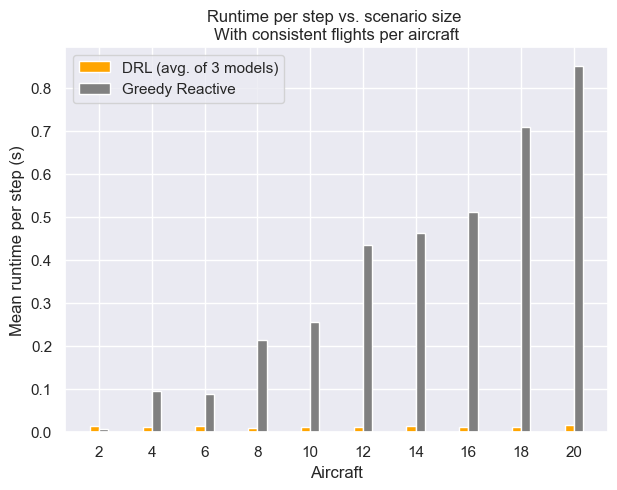

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Load data
df = pd.read_csv("runtimes_abc.csv")

# Rename 'exact' to 'Heuristic' (or 'Greedy', whichever is preferred)
df.loc[df['model'] == 'exact', 'model'] = 'Greedy Reactive'

# Identify which models are DRL
drl_models = ["myopic_2023.zip", "proactive_2023.zip", "reactive_2023.zip"]
heuristic_model = ["Greedy Reactive"]

# Create a new column to differentiate DRL vs. Heuristic
df['model_type'] = df['model'].apply(lambda x: 'DRL' if x in drl_models else 'Heuristic')

# Group by scenario size (e.g., flights_per_scenario) and model_type, then compute the mean runtime_per_step
grouped = df.groupby(['ac', 'model_type'], as_index=False)['runtime_per_step'].mean()

# Pivot so that DRL and Heuristic appear as separate columns for easy plotting
plot_df = grouped.pivot(index='ac', columns='model_type', values='runtime_per_step').reset_index()

# Plot bar chart
plt.figure(figsize=(7, 5))

# Create bar plot for DRL and Heuristic
bar_width = 0.35
x = plot_df['ac']

plt.bar(x - bar_width / 2, plot_df['DRL'], width=bar_width, color="orange", label='DRL (avg. of 3 models)')
plt.bar(x + bar_width / 2, plot_df['Heuristic'], width=bar_width, color='grey', label='Greedy Reactive')

# Label the axes
plt.xlabel("Aircraft")
plt.ylabel("Mean runtime per step (s)")
plt.title("Runtime per step vs. scenario size \nWith consistent flights per aircraft")

# Set x-axis ticks to only include real numbers and every 2
plt.xticks([x for x in range(min(plot_df['ac']), max(plot_df['ac']) + 1, 2)])

# Add legend
plt.legend()

# Save figure
plt.savefig("runtime_per_step_scaling_barplot.png", dpi=300, bbox_inches='tight')
plt.show()


In [33]:
import numpy as np

# Calculate the slope (runtime increase per aircraft) for Heuristic
heuristic_slope, _ = np.polyfit(plot_df['ac'], plot_df['Heuristic'], 1)

# Calculate the slope (runtime increase per aircraft) for DRL
drl_slope, _ = np.polyfit(plot_df['ac'], plot_df['DRL'], 1)

# Print the results
print(f"Average increase of runtime per extra aircraft for Greedy Reactive: {heuristic_slope:.4f} sec/aircraft (runtime per step)")
print(f"Average increase of runtime per extra aircraft for DRL (average of 3 models): {drl_slope:.4f} sec/aircraft (runtime per step)")


Average increase of runtime per extra aircraft for Greedy Reactive: 0.0452 sec/aircraft (runtime per step)
Average increase of runtime per extra aircraft for DRL (average of 3 models): 0.0001 sec/aircraft (runtime per step)


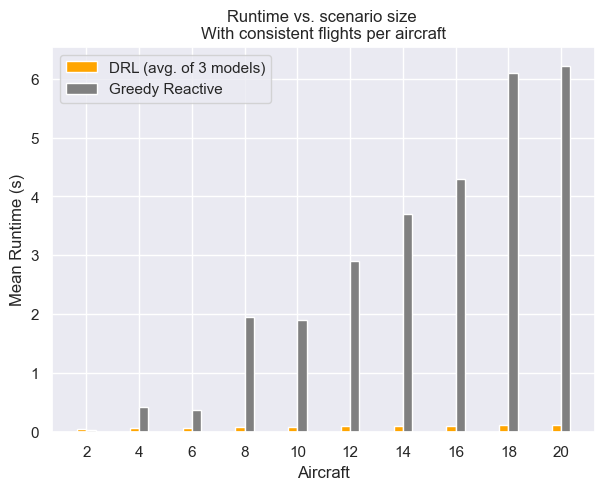

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Load data
df = pd.read_csv("runtimes_abc.csv")

# Rename 'exact' to 'Heuristic' (or 'Greedy', whichever is preferred)
df.loc[df['model'] == 'exact', 'model'] = 'Greedy Reactive'

# Identify which models are DRL
drl_models = ["myopic_2023.zip", "proactive_2023.zip", "reactive_2023.zip"]
heuristic_model = ["Greedy Reactive"]

# Create a new column to differentiate DRL vs. Heuristic
df['model_type'] = df['model'].apply(lambda x: 'DRL' if x in drl_models else 'Heuristic')

# Group by scenario size (e.g., flights_per_scenario) and model_type, then compute the mean runtime
grouped = df.groupby(['ac', 'model_type'], as_index=False)['runtime'].mean()

# Pivot so that DRL and Heuristic appear as separate columns for easy plotting
plot_df = grouped.pivot(index='ac', columns='model_type', values='runtime').reset_index()

# Plot bar chart
plt.figure(figsize=(7, 5))

# Create bar plot for DRL and Heuristic
bar_width = 0.35
x = plot_df['ac']

plt.bar(x - bar_width / 2, plot_df['DRL'], width=bar_width, color="orange", label='DRL (avg. of 3 models)')
plt.bar(x + bar_width / 2, plot_df['Heuristic'], width=bar_width, color='grey', label='Greedy Reactive')

# Label the axes
plt.xlabel("Aircraft")
plt.ylabel("Mean Runtime (s)")
plt.title("Runtime vs. scenario size \nWith consistent flights per aircraft")

# Set x-axis ticks to only include real numbers and every 2
plt.xticks([x for x in range(min(plot_df['ac']), max(plot_df['ac']) + 1, 2)])

# Add legend
plt.legend()

# Save figure
plt.savefig("runtime_scaling_barplot.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
import numpy as np

# Calculate the slope (runtime increase per aircraft) for Heuristic
heuristic_slope, _ = np.polyfit(plot_df['ac'], plot_df['Heuristic'], 1)

# Calculate the slope (runtime increase per aircraft) for DRL
drl_slope, _ = np.polyfit(plot_df['ac'], plot_df['DRL'], 1)

# Print the results
print(f"Average increase of runtime per extra aircraft for Greedy Reactive: {heuristic_slope:.4f} sec/aircraft")
print(f"Average increase of runtime per extra aircraft for DRL (average of 3 models): {drl_slope:.4f} sec/aircraft")


Average increase of runtime per extra aircraft for Greedy Reactive: 0.3675 sec/aircraft
Average increase of runtime per extra aircraft for DRL (average of 3 models): 0.0038 sec/aircraft
